<a href="https://colab.research.google.com/github/yogeshprabhakar/Titanic-Kaggle-/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 	0 = No,</br> 1 = Yes |
| pclass | Ticket class | 1 = 1st,</br> 2 = 2nd,</br> 3 = 3rd|
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg,</br> Q = Queenstown,</br> S = Southampton  |
 	
 	

In [ ]:
"""
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

"""

'\nVariable\tDefinition\tKey\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\n\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\nVariable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\n\n'

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/yogeshprabhakar/Titanic-Kaggle-/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/yogeshprabhakar/Titanic-Kaggle-/master/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# For now, let's remove feature Cabin from our dataset, will handle missing values of Age later
df_train.drop(columns = ['Cabin'], inplace = True)
df_test.drop(columns = ['Cabin'], inplace = True)
df_train.dropna(subset = ['Embarked'], inplace = True)

**Data Visualization**

In [ ]:
# Most of the passengers travelled alone.
print(df_train['SibSp'].value_counts())
print()
print(df_train['Parch'].value_counts())

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


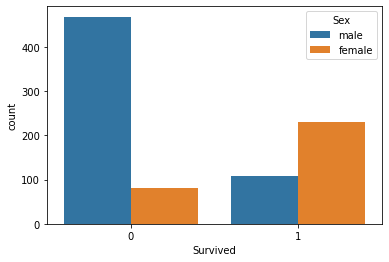

In [ ]:
#Females are more likely to survive
sns.countplot(x = 'Survived',hue = 'Sex', data = df_train)

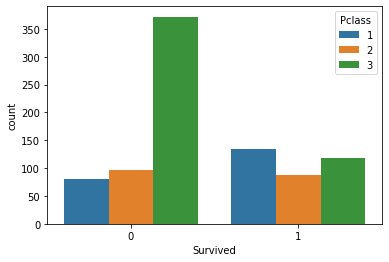

In [ ]:
#Passengers in first and second class more likely to survive
sns.countplot(x = 'Survived',hue = 'Pclass', data = df_train)

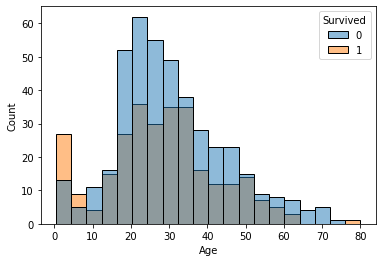

In [ ]:
# Children (age < 15) and Elderly (age > 50) are more likely to survive
sns.histplot(df_train, x = 'Age', hue = 'Survived')

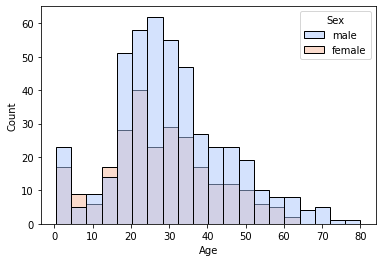

In [ ]:
sns.histplot(df_train, x = 'Age', hue = 'Sex', palette = 'coolwarm')

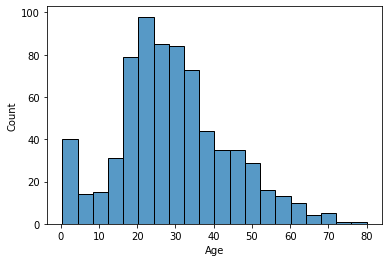

In [ ]:
# Distribution of Passenger Age
sns.histplot(df_train, x = 'Age')

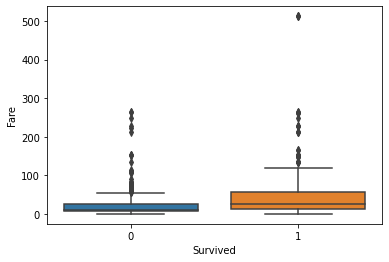

In [ ]:
# Rich Passenger has better chance to survive
sns.boxplot(data = df_train, y = 'Fare', x = 'Survived')

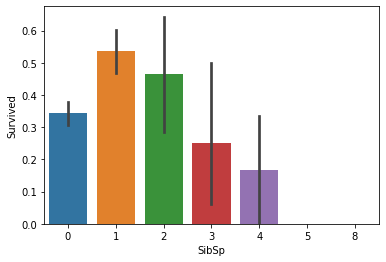

In [ ]:
# do hypothesis test to find if there are same distibution
sns.barplot(data = df_train, x = 'SibSp', y = 'Survived')

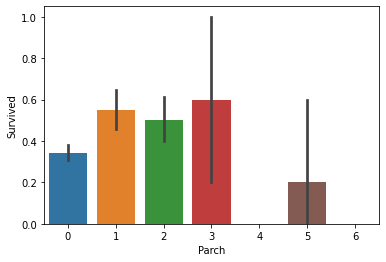

In [ ]:
# do hypothesis test to find if there are same distibution
sns.barplot(data = df_train, x = 'Parch', y = 'Survived')

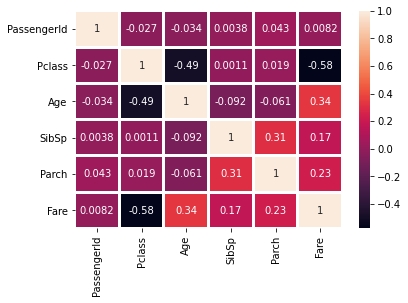

In [ ]:
sns.heatmap(df_test.corr(), annot = True, lw = 2)

(-25.616460000000004, 250.0)

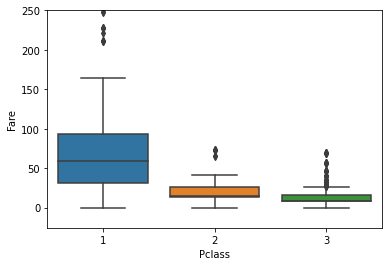

In [ ]:
# let's explore relation between features Pclass, Fare and Pclass, Age
# Higher the class, higher the fare. That's logical
sns.boxplot(data = df_train, x = 'Pclass', y = 'Fare')
plt.ylim(top = 250)

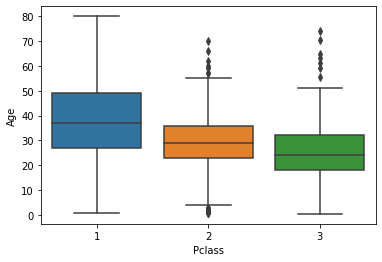

In [ ]:
# Higher the class, higher is the average age of that class
sns.boxplot(data = df_train, x = 'Pclass', y = 'Age')

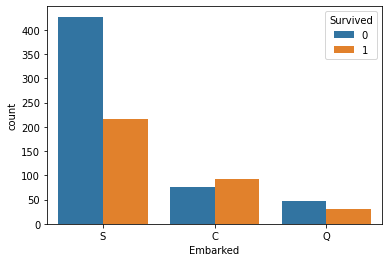

In [ ]:
# those who embarked from Southampton has low chance of surviving
sns.countplot(data = df_train, x = 'Embarked', hue = 'Survived')

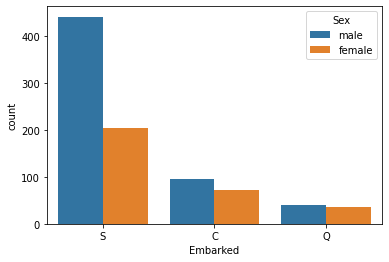

In [ ]:
# Primary reason seems to be more men embarked from Southampton
sns.countplot(data = df_train, x = 'Embarked', hue = 'Sex')

In [ ]:
# Taking care of categorical Data
df_train['Gender'] = pd.get_dummies(df_train['Sex'],drop_first = True)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'],drop_first = True)], axis = 1)

In [ ]:
df_train['Title'] = df_train['Name'].str.findall('\S+,\s(\S+).').str.get(0)
df_train['Title'].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Lady.          1
Mme.           1
the            1
Don.           1
Sir.           1
Jonkheer.      1
Ms.            1
Capt.          1
Name: Title, dtype: int64

In [ ]:
X = df_train.drop(columns = ['Survived', 'Ticket']).copy()
y = df_train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [ ]:
X_train_FillAge = X_train.groupby('Title')['Age'].mean().to_dict()
X_test_FillAge = X_test.groupby('Title')['Age'].mean().to_dict()

In [ ]:
print(X_train_FillAge)
print(X_test_FillAge)

{'Col.': 56.0, 'Don.': 40.0, 'Dr.': 42.0, 'Jonkheer.': 38.0, 'Major.': 48.5, 'Master.': 5.583181818181818, 'Miss.': 21.644736842105264, 'Mlle.': 24.0, 'Mr.': 32.036821705426355, 'Mrs.': 35.48, 'Rev.': 43.4, 'Sir.': 49.0, 'the': 33.0}
{'Capt.': 70.0, 'Col.': 60.0, 'Lady.': 48.0, 'Master.': 2.988571428571429, 'Miss.': 21.695, 'Mme.': 24.0, 'Mr.': 32.97857142857143, 'Mrs.': 36.0625, 'Ms.': 28.0, 'Rev.': 42.0}


In [ ]:
X_train['Age'] = X_train.apply(lambda row: X_train_FillAge[row['Title']] if np.isnan(row['Age']) else row['Age'], axis=1)
X_test['Age'] = X_test.apply(lambda row: X_test_FillAge[row['Title']] if np.isnan(row['Age']) else row['Age'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train.drop(columns=['Name', 'Sex', 'Embarked', 'Title', 'PassengerId'], inplace = True)
X_test.drop(columns=['Name', 'Sex', 'Embarked', 'Title', 'PassengerId'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
X_trainScaled = scaler1.fit_transform(X_train)
X_testScaled = scaler2.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lm = LogisticRegression()
lm.fit(X_trainScaled, y_train)
pred = lm.predict(X_testScaled)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       188
           1       0.78      0.68      0.72       124

    accuracy                           0.79       312
   macro avg       0.79      0.77      0.78       312
weighted avg       0.79      0.79      0.79       312

[[164  24]
 [ 40  84]]


In [ ]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       188
           1       0.80      0.73      0.76       124

    accuracy                           0.82       312
   macro avg       0.82      0.81      0.81       312
weighted avg       0.82      0.82      0.82       312

[[165  23]
 [ 33  91]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       188
           1       0.61      0.58      0.59       124

    accuracy                           0.68       312
   macro avg       0.67      0.67      0.67       312
weighted avg       0.68      0.68      0.68       312

[[141  47]
 [ 52  72]]


In [ ]:
svc = SVC(C = 50)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       188
           1       0.77      0.65      0.71       124

    accuracy                           0.79       312
   macro avg       0.78      0.76      0.77       312
weighted avg       0.78      0.79      0.78       312

[[164  24]
 [ 43  81]]
